In [1]:

%matplotlib inline
import openmc


In [2]:
#Material_Definition

uo2 = openmc.Material(1, "uo2")
print(uo2)


Material
	ID             =	1
	Name           =	uo2
	Temperature    =	None
	Density        =	None [sum]
	S(a,b) Tables  
	Nuclides       



In [3]:

mat=openmc.Material()
print(mat)


Material
	ID             =	2
	Name           =	
	Temperature    =	None
	Density        =	None [sum]
	S(a,b) Tables  
	Nuclides       



In [4]:
help(uo2.add_nuclide)

Help on method add_nuclide in module openmc.material:

add_nuclide(nuclide, percent, percent_type='ao') method of openmc.material.Material instance
    Add a nuclide to the material
    
    Parameters
    ----------
    nuclide : str
        Nuclide to add, e.g., 'Mo95'
    percent : float
        Atom or weight percent
    percent_type : {'ao', 'wo'}
        'ao' for atom percent and 'wo' for weight percent



In [5]:
#Add Nuclides to Uo2

uo2.add_nuclide('U235', 0.03)
uo2.add_nuclide('U238', 0.97)
uo2.add_nuclide('O16', 2.0)


In [6]:
#Set density

uo2.set_density('g/cm3', 10.0 )


In [7]:
#Materials for the clad and coolant-Moderator

#Clad Material
Zr = openmc.Material(2, "zirconium")
Zr.add_nuclide('Zr', 1.0)
Zr.set_density('g/cm3', 6.6)
print(Zr)

#Moderator Material
h2o = openmc.Material(3, "water")
h2o.add_nuclide('H1', 2.0)
h2o.add_nuclide('O16', 1.0)
h2o.set_density('g/cm3', 1.0)
print(h2o)


Material
	ID             =	2
	Name           =	zirconium
	Temperature    =	None
	Density        =	6.6 [g/cm3]
	S(a,b) Tables  
	Nuclides       
	Zr             =	1.0          [ao]

Material
	ID             =	3
	Name           =	water
	Temperature    =	None
	Density        =	1.0 [g/cm3]
	S(a,b) Tables  
	Nuclides       
	H1             =	2.0          [ao]
	O16            =	1.0          [ao]



/home/ashraful/miniconda3/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/ashraful/miniconda3/lib/python3.8/site-packages/openmc/material.py:386: UserWarning: 'Zr' does not appear to be a nuclide name in GND format
  warnings.warn(str(e))


In [8]:
#If we use add_element instead of add_nuclide; give us the value of isotopic concentration automatically

#Clad Material
Zr = openmc.Material(2, "zirconium")
Zr.add_element('Zr', 1.0)
Zr.set_density('g/cm3', 6.6)
print(Zr)

h2o = openmc.Material(3, "water")
h2o.add_element('H', 2.0)
h2o.add_element('O', 1.0)
h2o.set_density('g/cm3', 1.0)
print(h2o)

Material
	ID             =	2
	Name           =	zirconium
	Temperature    =	None
	Density        =	6.6 [g/cm3]
	S(a,b) Tables  
	Nuclides       
	Zr90           =	0.5145       [ao]
	Zr91           =	0.1122       [ao]
	Zr92           =	0.1715       [ao]
	Zr94           =	0.1738       [ao]
	Zr96           =	0.028        [ao]

Material
	ID             =	3
	Name           =	water
	Temperature    =	None
	Density        =	1.0 [g/cm3]
	S(a,b) Tables  
	Nuclides       
	H1             =	1.99968852   [ao]
	H2             =	0.00031148   [ao]
	O16            =	0.999621     [ao]
	O17            =	0.000379     [ao]



/home/ashraful/miniconda3/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)


In [9]:
#Define the Enrichment level of an element

uo2_three = openmc.Material()
uo2_three.add_element('U', 1.0, enrichment=3.0)
uo2_three.add_element('O', 2.0)
uo2.set_density('g/cm3', 10.0)
print(uo2)

Material
	ID             =	1
	Name           =	uo2
	Temperature    =	None
	Density        =	10.0 [g/cm3]
	S(a,b) Tables  
	Nuclides       
	U235           =	0.03         [ao]
	U238           =	0.97         [ao]
	O16            =	2.0          [ao]



In [10]:
#Add s alpha beta table

h2o.add_s_alpha_beta('c_H_in_H2O')

In [11]:
mats = openmc.Materials([uo2, Zr, h2o])

In [12]:
#Material list testing

mats = openmc.Materials()
mats.append(uo2)
mats += [Zr, h2o]
isinstance(mats, list)


True

In [13]:
#Finally create xml file for material

mats.export_to_xml()
!cat materials.xml

<?xml version='1.0' encoding='utf-8'?>
<materials>
  <material depletable="true" id="1" name="uo2">
    <density units="g/cm3" value="10.0" />
    <nuclide ao="0.03" name="U235" />
    <nuclide ao="0.97" name="U238" />
    <nuclide ao="2.0" name="O16" />
  </material>
  <material id="2" name="zirconium">
    <density units="g/cm3" value="6.6" />
    <nuclide ao="0.5145" name="Zr90" />
    <nuclide ao="0.1122" name="Zr91" />
    <nuclide ao="0.1715" name="Zr92" />
    <nuclide ao="0.1738" name="Zr94" />
    <nuclide ao="0.028" name="Zr96" />
  </material>
  <material id="3" name="water">
    <density units="g/cm3" value="1.0" />
    <nuclide ao="1.99968852" name="H1" />
    <nuclide ao="0.00031148" name="H2" />
    <nuclide ao="0.999621" name="O16" />
    <nuclide ao="0.000379" name="O17" />
    <sab name="c_H_in_H2O" />
  </material>
</materials>


In [14]:
#We can remove nuclide and add element; after creating xml file

h2o.remove_nuclide('O16')
h2o.add_element('O', 1.0)

mats.export_to_xml()
!cat materials.xml

<?xml version='1.0' encoding='utf-8'?>
<materials>
  <material depletable="true" id="1" name="uo2">
    <density units="g/cm3" value="10.0" />
    <nuclide ao="0.03" name="U235" />
    <nuclide ao="0.97" name="U238" />
    <nuclide ao="2.0" name="O16" />
  </material>
  <material id="2" name="zirconium">
    <density units="g/cm3" value="6.6" />
    <nuclide ao="0.5145" name="Zr90" />
    <nuclide ao="0.1122" name="Zr91" />
    <nuclide ao="0.1715" name="Zr92" />
    <nuclide ao="0.1738" name="Zr94" />
    <nuclide ao="0.028" name="Zr96" />
  </material>
  <material id="3" name="water">
    <density units="g/cm3" value="1.0" />
    <nuclide ao="1.99968852" name="H1" />
    <nuclide ao="0.00031148" name="H2" />
    <nuclide ao="0.000379" name="O17" />
    <nuclide ao="0.999621" name="O16" />
    <nuclide ao="0.000379" name="O17" />
    <sab name="c_H_in_H2O" />
  </material>
</materials>


In [15]:
#Defining geometry
#Create a sphere

sph = openmc.Sphere(r = 1.0)



In [16]:
#Define positive and negative half spsce

inside_sphere = -sph
outside_sphere = +sph


In [17]:
#Checking_inside_sphere actually contains points inside the sphere:

print((0,0,0) in inside_sphere, (0,0,2) in inside_sphere)
print((0,0,0) in outside_sphere, (0,0,2) in outside_sphere)

print((1,0,0) in inside_sphere, (0,2,0) in inside_sphere)
print((1,0,0) in outside_sphere, (0,2,0) in outside_sphere)


True False
False True
False False
True True


In [18]:
#define a region that is the top part of the sphere by using Boolean algebra

z_plane = openmc.ZPlane(z0=0)
northern_hemisphere = -sph & + z_plane      #Here northern_hemisphere is a region

#Define bounding box to see coordinates

northern_hemisphere.bounding_box


(array([-1., -1.,  0.]), array([1., 1., 1.]))

In [19]:
#Now that we see how to create volumes, we can use them to create a cell.
#Create a cell

cell = openmc.Cell(region = northern_hemisphere)

#Or.........

cell = openmc.Cell()
cell.region = northern_hemisphere


In [20]:
#By default, the cell is empty so we need to fill the cell

cell.fill = h2o


In [21]:
#Define Universe
#A collection of cells is known as a universe; which can be used as a repeatable unit when creating a model
#the benefit of creating a universe is that we can visualize our geometry while we're creating it

universe = openmc.Universe()
universe.add_cell(cell)


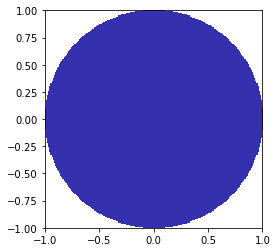

In [22]:
#Plot the geometry

universe.plot(width = (2, 2))


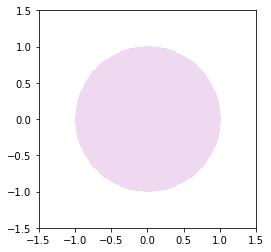

In [23]:
universe.plot(width = (3, 3))

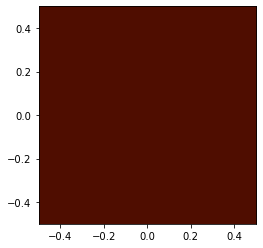

In [24]:
universe.plot(width = (1, 1))

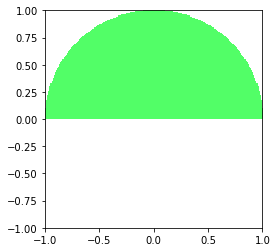

In [25]:
#By default, the plot will appear in the x-y plane. We can change that with the basis argument

universe.plot(width = (2, 2), basis = 'xz')


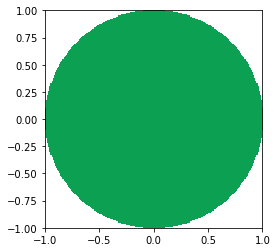

In [26]:
universe.plot(width = (2, 2), basis = 'xy')

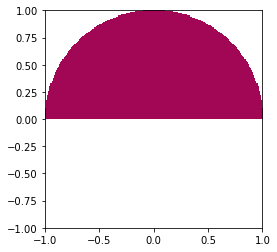

In [27]:
universe.plot(width = (2, 2), basis = 'yz')

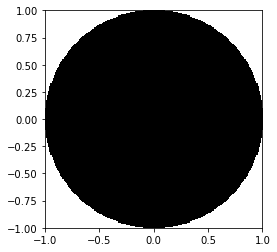

In [28]:
#For particular colors

universe.plot(width = (2, 2), basis = 'xy', colors = {cell: 'black'})


In [29]:
#Pin cell geometry define
#Pin cell geometry define
#Pin cell geometry define

#Create surface

fuel_or = openmc.ZCylinder(r = 0.38)
clad_ir = openmc.ZCylinder(r = 0.40)
clad_or = openmc.ZCylinder(r = 0.46)

#Create region

fuel_region = -fuel_or
gap_region = +fuel_or & -clad_ir
clad_region = +clad_ir & -clad_or



In [30]:
#Create the cell

fuel = openmc.Cell(1, 'fuel')
fuel.fill = uo2
fuel.region = fuel_region

gap = openmc.Cell(2, 'gap')
gap.region = gap_region

clad = openmc.Cell(3, 'clad')
clad.fill = Zr
clad.region = clad_region


/home/ashraful/miniconda3/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=1.
  warn(msg, IDWarning)
/home/ashraful/miniconda3/lib/python3.8/site-packages/openmc/mixin.py:68: IDWarning: Another Cell instance already exists with id=2.
  warn(msg, IDWarning)


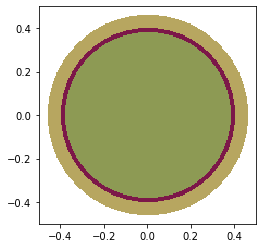

In [31]:
#Create universe; Extra portion

universe = openmc.Universe()
universe.add_cell(fuel)
universe.add_cell(gap)
universe.add_cell(clad)

universe.plot(width = (1, 1))


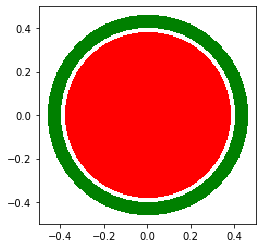

In [32]:

universe.plot(width = (1, 1), colors = {fuel: 'red', gap: 'white', clad: 'green'})


In [33]:
#Boundary of the geometry in XY plane

pitch = 1.26
left = openmc.XPlane(x0 = -pitch/2, boundary_type = 'reflective')
right = openmc.XPlane(x0 = pitch/2, boundary_type = 'reflective')
bottom = openmc.YPlane(y0 = -pitch/2, boundary_type = 'reflective')
top = openmc.YPlane(y0 = pitch/2, boundary_type = 'reflective')



In [34]:
#Define water region by using them

water_region = +left & -right & +bottom & -top & +clad_or


In [35]:
#Create another cell

moderator = openmc.Cell(4, 'moderator')
moderator.fill = h2o
moderator.region = water_region


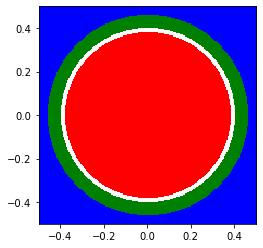

In [36]:
#Overall plot

universe.add_cell(moderator)

universe.plot(width = (1, 1), colors = {fuel: 'red', gap: 'white', clad: 'green', moderator: 'blue'})



In [37]:
#Boundary of the geometry in XY plane can also be generated by another simple way

box = openmc.rectangular_prism(width = pitch, height = pitch, boundary_type = 'reflective')
type(box)


openmc.region.Intersection

In [38]:
#Define water region for this case

water_region = box & +clad_or


In [39]:
#Create the root universe

root = openmc.Universe(cells = (fuel, gap, clad, moderator))

geom = openmc.Geometry(root)

#Or
geom = openmc.Geometry()
geom.root_universe = root

#Finally create the geometry xml file

geom.export_to_xml()
!cat geometry.xml


<?xml version='1.0' encoding='utf-8'?>
<geometry>
  <cell id="1" material="1" name="fuel" region="-3" universe="3" />
  <cell id="2" material="void" name="gap" region="3 -4" universe="3" />
  <cell id="3" material="2" name="clad" region="4 -5" universe="3" />
  <cell id="4" material="3" name="moderator" region="6 -7 8 -9 5" universe="3" />
  <surface coeffs="0.0 0.0 0.38" id="3" type="z-cylinder" />
  <surface coeffs="0.0 0.0 0.4" id="4" type="z-cylinder" />
  <surface coeffs="0.0 0.0 0.46" id="5" type="z-cylinder" />
  <surface boundary="reflective" coeffs="-0.63" id="6" type="x-plane" />
  <surface boundary="reflective" coeffs="0.63" id="7" type="x-plane" />
  <surface boundary="reflective" coeffs="-0.63" id="8" type="y-plane" />
  <surface boundary="reflective" coeffs="0.63" id="9" type="y-plane" />
</geometry>


In [40]:
#Creating starting source and creating setting xml file
#By using openMC's internal probability distribution

point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space = point)


In [41]:
#Now we create a Settings object to specify how many batches and particles we want to run

settings = openmc.Settings()
settings.source = src
settings.batches = 100
settings.inactive = 10
settings.particles = 1000

#Finally create the setting xml file

settings.export_to_xml()
!cat settings.xml


<?xml version='1.0' encoding='utf-8'?>
<settings>
  <run_mode>eigenvalue</run_mode>
  <particles>1000</particles>
  <batches>100</batches>
  <inactive>10</inactive>
  <source strength="1.0">
    <space type="point">
      <parameters>0 0 0</parameters>
    </space>
  </source>
</settings>


In [42]:
#Create user defind tallies xml file to specify total, fission, absorption, and (n,γ) reaction rates for 235U in the cell containing fuel

cell_filter = openmc.CellFilter(fuel)

t = openmc.Tally(1)
t.filters = [cell_filter]

#fixed material for tally

t.nuclides = ['U235']
t.scores = ['total', 'fission', 'absorption', '(n,gamma)']

tallies = openmc.Tallies([t])


In [43]:
#Finally create the settings xml file

tallies.export_to_xml()
!cat tallies.xml

<?xml version='1.0' encoding='utf-8'?>
<tallies>
  <filter id="1" type="cell">
    <bins>1</bins>
  </filter>
  <tally id="1">
    <filters>1</filters>
    <nuclides>U235</nuclides>
    <scores>total fission absorption (n,gamma)</scores>
  </tally>
</tallies>


In [44]:
#Finall Run the openMC

openmc.run()


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [45]:
#See the tally we defined

!cat tallies.out


 ============================>     TALLY 1     <============================

 Cell 1
   U235
     Total Reaction Rate                  0.730163 +/- 0.00256282
     Fission Rate                         0.549668 +/- 0.00211175
     Absorption Rate                      0.659136 +/- 0.00249166
     (n,gamma)                            0.109469 +/- 0.000392232
